# Logistic Regression

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import operator
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [129]:
instagram = pd.read_csv(os.path.join('train.csv'))
instagram.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [130]:
X = instagram.drop("fake", axis=1)
y = instagram["fake"]
print(X.shape, y.shape)

(576, 11) (576,)


In [131]:
pd.get_dummies(X)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
5,1,0.00,4,0.00,0,81,1,0,344,669987,150
6,1,0.00,2,0.00,0,50,0,0,16,122,177
7,1,0.00,2,0.00,0,0,0,0,33,1078,76
8,1,0.00,0,0.00,0,71,0,0,72,1824,2713
9,1,0.00,2,0.00,0,40,1,0,213,12945,813


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [133]:
X_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
208,1,0.0,0,0.0,0,18,0,1,133,1008,517
114,1,0.0,1,0.0,0,0,0,0,1,331,333
21,1,0.0,1,0.0,0,35,1,1,35,1809,416
201,1,0.0,0,0.0,0,8,0,1,12,173,373
44,1,0.0,4,0.0,0,35,0,0,4494,12397719,8


In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
classifier = LogisticRegression(penalty='l2')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
classifier.fit(X_train, y_train)

/Users/drewrussell/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6967592592592593
Testing Data Score: 0.6875


In [138]:
prediction = classifier.predict(X_test)
print(f"First 10 Predictions:   {prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 1 0 1 0 0 0 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [139]:
prediction_actual=pd.DataFrame({"Prediction": prediction, "Actual": y_test}).reset_index(drop=True)

In [140]:
Counter=0
for i in range(len(prediction_actual["Prediction"])):
    if prediction_actual.Prediction[i]==prediction_actual.Actual[i]:
        Counter=Counter+1
        
Counter_false=len(prediction_actual.Prediction)-Counter

In [141]:
Counter, Counter_false

(99, 45)

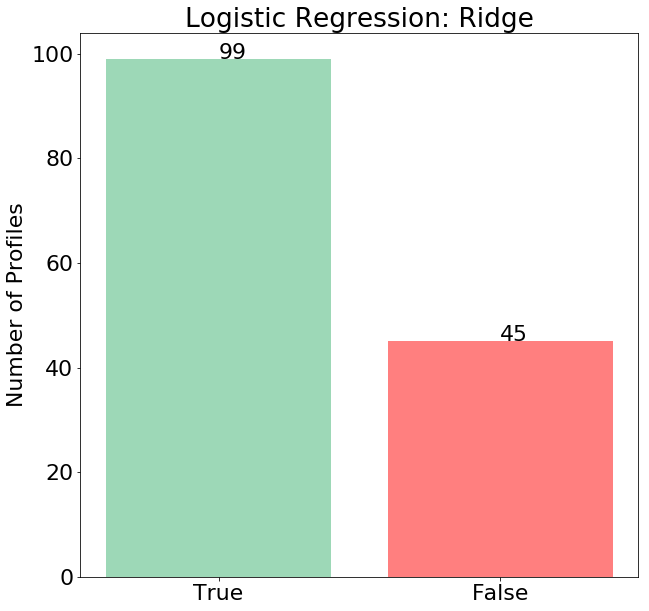

In [142]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
true_false = ('True', 'False')
y_axis = np.arange(len(true_false))
x_axis = [Counter, Counter_false]
plt.bar(y_axis, x_axis, align='center', alpha=0.5, color=['mediumseagreen', 'red'])
plt.xticks(y_axis, true_false)
plt.ylabel('Number of Profiles')
plt.title('Logistic Regression: Ridge')
plt.annotate(xy=[0,x_axis[0]], s=x_axis[0])
plt.annotate(xy=[1,x_axis[1]], s=x_axis[1])
plt.savefig("Ridge.png")


In [143]:
classifier = LogisticRegression(penalty='l1')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
classifier.fit(X_train, y_train)

/Users/drewrussell/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9050925925925926
Testing Data Score: 0.9375


In [146]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 1 1 1 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [147]:
predictions_actual=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [148]:
predictions_actual

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [149]:
counter=0
for i in range(len(predictions_actual["Prediction"])):
    if predictions_actual.Prediction[i]==predictions_actual.Actual[i]:
        counter=counter+1
        
counter_false=len(predictions_actual.Prediction)-counter


In [150]:
counter, counter_false

(135, 9)

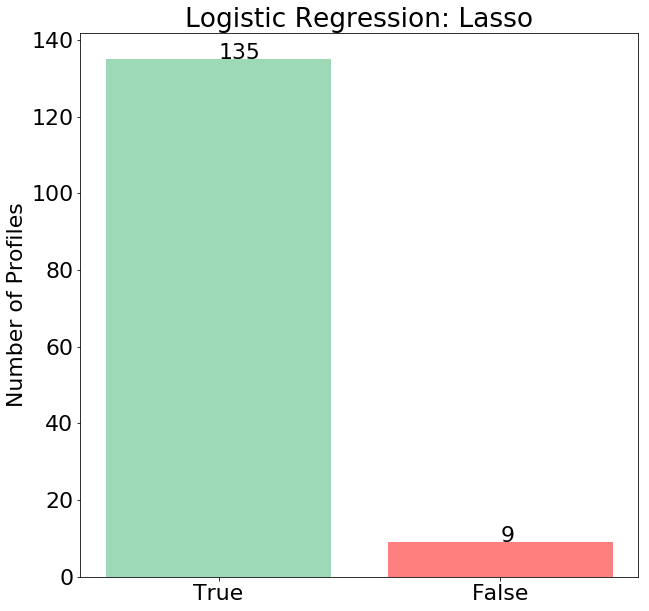

In [151]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
true_false = ('True', 'False')
y_axis = np.arange(len(true_false))
x_axis = [counter, counter_false]
plt.bar(y_axis, x_axis, align='center', alpha=0.5, color=['mediumseagreen', 'red'])
plt.xticks(y_axis, true_false)
plt.ylabel('Number of Profiles')
plt.title('Logistic Regression: Lasso')
plt.annotate(xy=[0,x_axis[0]], s=x_axis[0])
plt.annotate(xy=[1,x_axis[1]], s=x_axis[1])
plt.savefig('Lasso.png')


# Random Forest

In [152]:
results = {}
for i in range(10, 300, 10):
    rf = RandomForestClassifier(n_estimators=i)
    rf = rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))
    results.update({i:rf.score(X_test, y_test)})

0.9305555555555556
0.9444444444444444
0.9513888888888888
0.9375
0.9444444444444444
0.9444444444444444
0.9375
0.9305555555555556
0.9375
0.9513888888888888
0.9375
0.9513888888888888
0.9444444444444444
0.9375
0.9583333333333334
0.9375
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9513888888888888
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9513888888888888
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444


In [153]:
best_estimator=max(results.items(), key=operator.itemgetter(1))[0]

In [154]:
importances = rf.feature_importances_
importances

array([0.07890062, 0.1438195 , 0.05122848, 0.00688058, 0.00075964,
       0.11151395, 0.00963685, 0.01133857, 0.18343784, 0.31631673,
       0.08616724])

In [155]:
rf = RandomForestClassifier(n_estimators=best_estimator)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))


0.9444444444444444


In [156]:
predictions2 = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions2[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 1 1 1 0 0 0 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [157]:
predictions_actual2=pd.DataFrame({"Prediction": predictions2, "Actual": y_test}).reset_index(drop=True)

In [158]:
predictions_actual2

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,1,0


In [159]:
counter2=0
for i in range(len(predictions_actual2["Prediction"])):
    if predictions_actual2.Prediction[i]==predictions_actual2.Actual[i]:
        counter2=counter2+1
        
counter_false2=len(predictions_actual2.Prediction)-counter2

In [160]:
counter2, counter_false2

(136, 8)

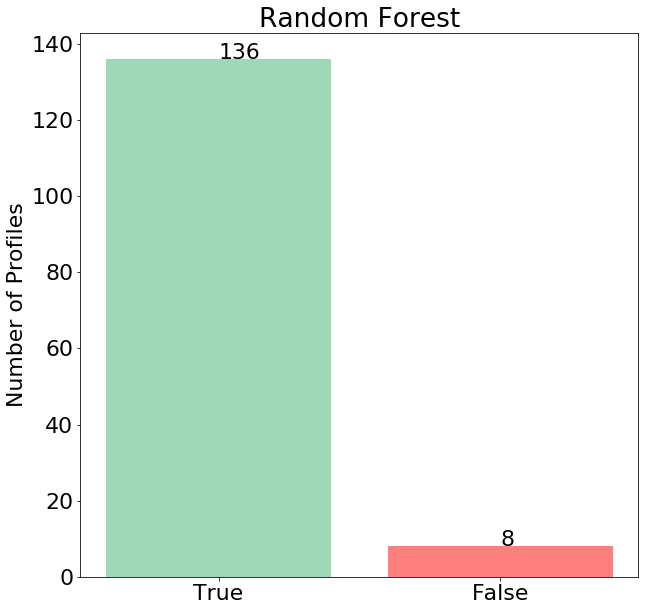

In [161]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
true_false = ('True', 'False')
y_axis = np.arange(len(true_false))
x_axis = [counter2, counter_false2]
plt.bar(y_axis, x_axis, align='center', alpha=0.5, color=['mediumseagreen', 'red'])
plt.xticks(y_axis, true_false)
plt.ylabel('Number of Profiles')
plt.title('Random Forest')
plt.annotate(xy=[0,x_axis[0]], s=x_axis[0])
plt.annotate(xy=[1,x_axis[1]], s=x_axis[1])
plt.savefig('RF_11_Features.png')

# Random Forest Feature Engineering: Remove Low-Importance Features

In [162]:
X2 = instagram.drop(["fake", "nums/length fullname", "name==username", "external URL"], axis=1)
y2 = instagram["fake"]
print(X2.shape, y2.shape)

(576, 8) (576,)


In [163]:
pd.get_dummies(X2)

,profile pic,nums/length username,fullname words,description length,private,#posts,#followers,#follows
0,1,0.27,0,53,0,32,1000,955
1,1,0.00,2,44,0,286,2740,533
2,1,0.10,2,0,1,13,159,98
3,1,0.00,1,82,0,679,414,651
4,1,0.00,2,0,1,6,151,126
5,1,0.00,4,81,0,344,669987,150
6,1,0.00,2,50,0,16,122,177
7,1,0.00,2,0,0,33,1078,76
8,1,0.00,0,71,0,72,1824,2713
9,1,0.00,2,40,0,213,12945,813


In [164]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1, stratify=y)

In [165]:
results2 = {}
for i in range(10, 300, 10):
    rf2 = RandomForestClassifier(n_estimators=i)
    rf2 = rf2.fit(X2_train, y2_train)
    print(rf2.score(X2_test, y2_test))
    results2.update({i:rf2.score(X2_test, y2_test)})

0.9375
0.9444444444444444
0.9375
0.9444444444444444
0.9305555555555556
0.9444444444444444
0.9375
0.9375
0.9305555555555556
0.9305555555555556
0.9375
0.9444444444444444
0.9513888888888888
0.9444444444444444
0.9444444444444444
0.9305555555555556
0.9444444444444444
0.9513888888888888
0.9375
0.9444444444444444
0.9444444444444444
0.9513888888888888
0.9444444444444444
0.9375
0.9444444444444444
0.9513888888888888
0.9513888888888888
0.9444444444444444
0.9444444444444444


In [166]:
best_estimator=max(results2.items(), key=operator.itemgetter(1))[0]

In [167]:
best_estimator

130

In [168]:
importances = rf2.feature_importances_
importances

array([0.11407727, 0.14162877, 0.05545961, 0.11813407, 0.01047435,
       0.20291652, 0.25925017, 0.09805924])

In [169]:
rf2 = RandomForestClassifier(n_estimators=best_estimator)
rf2 = rf2.fit(X2_train, y2_train)
print(rf2.score(X2_test, y2_test))

0.9444444444444444


In [170]:
predictions3 = rf2.predict(X2_test)
print(f"First 10 Predictions:   {predictions3[:10]}")
print(f"First 10 Actual labels: {y2_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 1 1 1 0 0 0 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [171]:
predictions_actual3=pd.DataFrame({"Prediction": predictions3, "Actual": y2_test}).reset_index(drop=True)

In [172]:
counter3=0
for i in range(len(predictions_actual3["Prediction"])):
    if predictions_actual3.Prediction[i]==predictions_actual3.Actual[i]:
        counter3=counter3+1
        
counter_false3=len(predictions_actual3.Prediction)-counter3

In [173]:
counter3, counter_false3

(136, 8)

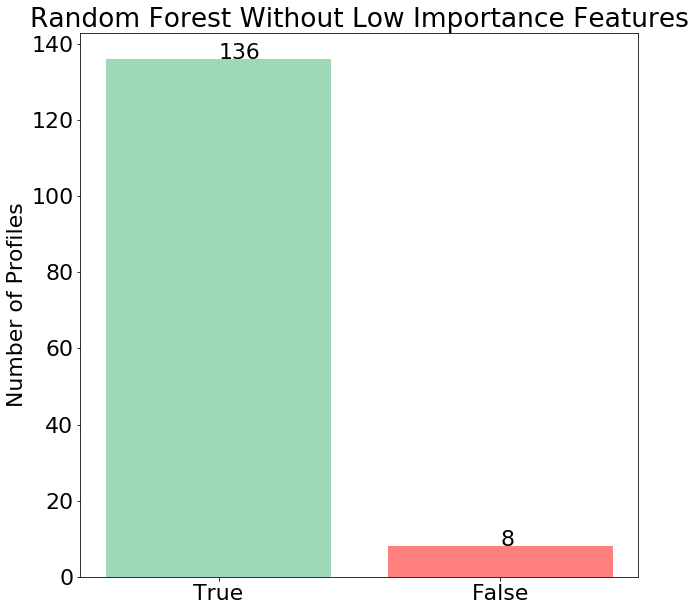

In [174]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
true_false = ('True', 'False')
y_axis = np.arange(len(true_false))
x_axis = [counter3, counter_false3]
plt.bar(y_axis, x_axis, align='center', alpha=0.5, color=['mediumseagreen', 'red'])
plt.xticks(y_axis, true_false)
plt.ylabel('Number of Profiles')
plt.title('Random Forest Without Low Importance Features')
plt.annotate(xy=[0,x_axis[0]], s=x_axis[0])
plt.annotate(xy=[1,x_axis[1]], s=x_axis[1])
plt.savefig('RF_8_Features.png')

# Random Forest Feature Engineering: Apply Log Function to Minimize Outliers

In [175]:
import numpy as np

In [176]:
instagram_copy=instagram.copy()

In [177]:
instagram_copy['#followers']=instagram['#followers'].map(lambda x:np.log(x+1))

In [178]:
instagram.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [179]:
X3 = instagram_copy.drop(["fake", "nums/length fullname", "name==username", "external URL"], axis=1)
y3 = instagram_copy["fake"]
print(X3.shape, y3.shape)

(576, 8) (576,)


In [180]:
pd.get_dummies(X3)

,profile pic,nums/length username,fullname words,description length,private,#posts,#followers,#follows
0,1,0.27,0,53,0,32,6.908755,955
1,1,0.00,2,44,0,286,7.916078,533
2,1,0.10,2,0,1,13,5.075174,98
3,1,0.00,1,82,0,679,6.028279,651
4,1,0.00,2,0,1,6,5.023881,126
5,1,0.00,4,81,0,344,13.415015,150
6,1,0.00,2,50,0,16,4.812184,177
7,1,0.00,2,0,0,33,6.983790,76
8,1,0.00,0,71,0,72,7.509335,2713
9,1,0.00,2,40,0,213,9.468542,813


In [181]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1, stratify=y)

In [182]:
results3 = {}
for i in range(10, 300, 10):
    rf3 = RandomForestClassifier(n_estimators=i)
    rf3 = rf3.fit(X3_train, y3_train)
    print(rf3.score(X3_test, y3_test))
    results3.update({i:rf3.score(X3_test, y3_test)})

0.9375
0.9375
0.9375
0.9444444444444444
0.9375
0.9375
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9305555555555556
0.9305555555555556
0.9444444444444444
0.9375
0.9375
0.9444444444444444
0.9375
0.9375
0.9375
0.9444444444444444
0.9375
0.9444444444444444
0.9375
0.9444444444444444
0.9375
0.9513888888888888
0.9375
0.9444444444444444
0.9375


In [183]:
instagram_copy.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,5.191867,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,2.569626,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.688879,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.020580,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,6.575064,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,16.545879,7500.000000,1.000000


In [184]:
best_estimator=max(results3.items(), key=operator.itemgetter(1))[0]

In [185]:
best_estimator

260

In [186]:
importances = rf3.feature_importances_
importances

array([0.11938692, 0.13307752, 0.05309404, 0.11536261, 0.01146517,
       0.17385941, 0.29915472, 0.09459963])

In [187]:
rf3 = RandomForestClassifier(n_estimators=best_estimator)
rf3 = rf3.fit(X3_train, y3_train)
print(rf3.score(X3_test, y3_test))

0.9375


In [188]:
predictions4 = rf3.predict(X3_test)
print(f"First 10 Predictions:   {predictions4[:10]}")
print(f"First 10 Actual labels: {y3_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 1 1 1 0 0 0 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [189]:
predictions_actual4=pd.DataFrame({"Prediction": predictions4, "Actual": y3_test}).reset_index(drop=True)

In [190]:
counter4=0
for i in range(len(predictions_actual4["Prediction"])):
    if predictions_actual4.Prediction[i]==predictions_actual4.Actual[i]:
        counter4=counter4+1
        
counter_false4=len(predictions_actual4.Prediction)-counter4

In [191]:
counter4, counter_false4

(135, 9)

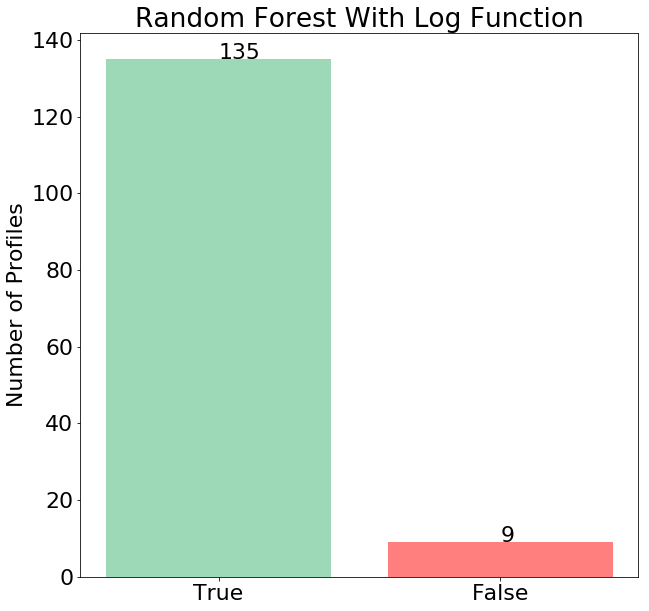

In [203]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
true_false = ('True', 'False')
y_axis = np.arange(len(true_false))
x_axis = [counter4, counter_false4]
plt.bar(y_axis, x_axis, align='center', alpha=0.5, color=['mediumseagreen', 'red'])
plt.xticks(y_axis, true_false)
plt.ylabel('Number of Profiles')
plt.title('Random Forest With Log Function')
plt.annotate(xy=[0,x_axis[0]], s=x_axis[0])
plt.annotate(xy=[1,x_axis[1]], s=x_axis[1])
plt.savefig('RF_Log_8_Features.png')

In [195]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [196]:
 scores = cross_val_score(rf3, X, y, cv=10)
print(f'Cross-validated scores:, {scores}')

Cross-validated scores:, [0.98275862 0.96551724 0.84482759 0.9137931  0.89655172 0.82758621
 0.98275862 1.         0.875      0.94642857]


In [197]:
from scipy.stats import sem, t
from scipy import mean

confidence = 0.95

data = scores

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h

end = m + h

print(f'We are 95% confident that the true mean of the population lies with in {start, end}')

We are 95% confident that the true mean of the population lies with in (0.8797299175287123, 0.967314417446657)
